In [52]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [53]:
# Generating the data for analysis
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [54]:
s = (pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index() # Normalizing and sorting
np.cumsum(s)

,count
2,0.0276
3,0.0809
4,0.1628
5,0.2765
6,0.4130
7,0.5821
8,0.7218
9,0.8275
10,0.9148
11,0.9705


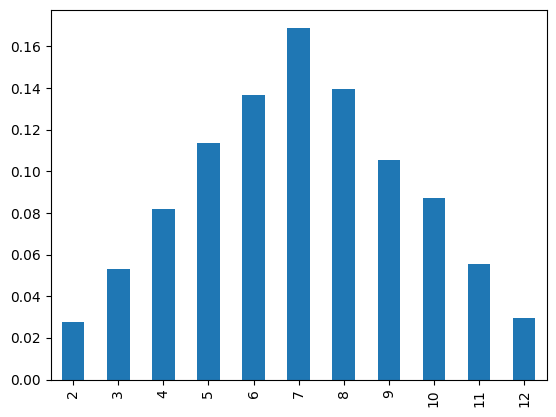

In [55]:
s.plot(kind = 'bar')
plt.show()

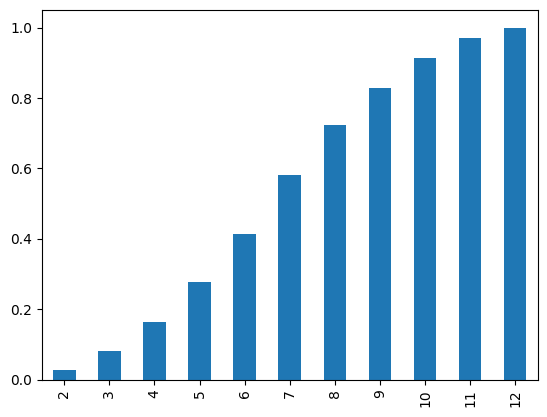

In [56]:
np.cumsum(s).plot(kind='bar')
plt.show()

---

In [57]:
# Generating normally distributed data
sample = np.random.normal(loc=50, scale=5, size=1000)
sample.mean()

np.float64(49.91548105409718)

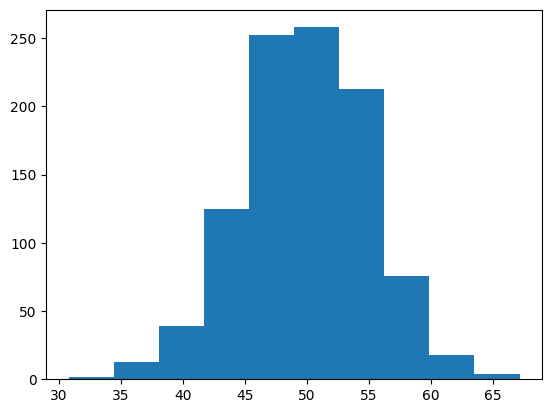

In [58]:
# Plot histogram to understand the distribution of data
plt.hist(sample, bins=10)
plt.show()

#### *`Parameteric Approach`*

In [59]:
# Parameters - Calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

# Fit the distribution with the above parameters
dist = norm(60, 12)

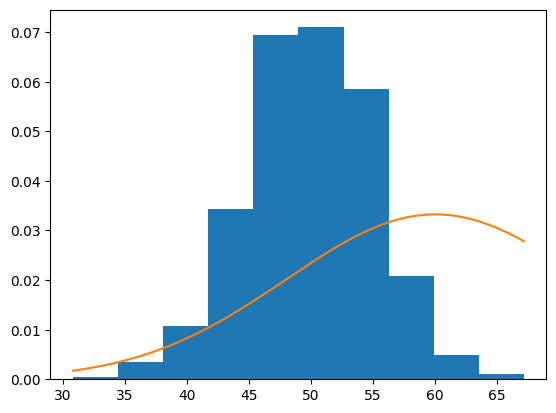

In [60]:
# Generating sorted values and its probabilities
values = np.linspace(sample.min(),sample.max(),1000)
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)
plt.show()

#### *`Non-Parametric Approach`*

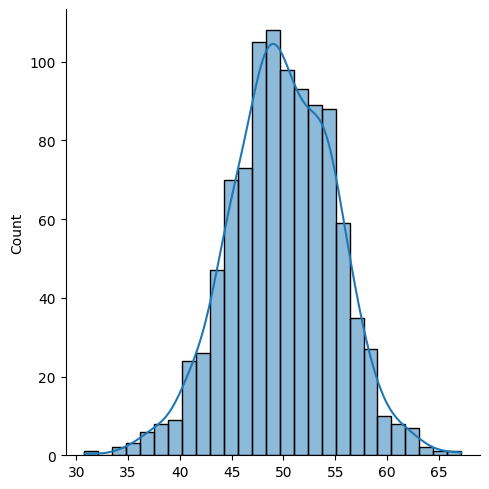

In [61]:
sns.displot(sample, kde = True)
plt.show()

---

In [62]:
# Generate a sample
sample1 = np.random.normal(loc=20, scale=5, size=300)
sample2 = np.random.normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [63]:
sample[:5]

array([16.76589355, 27.91072647, 24.70780806, 21.56761666, 19.12788767])

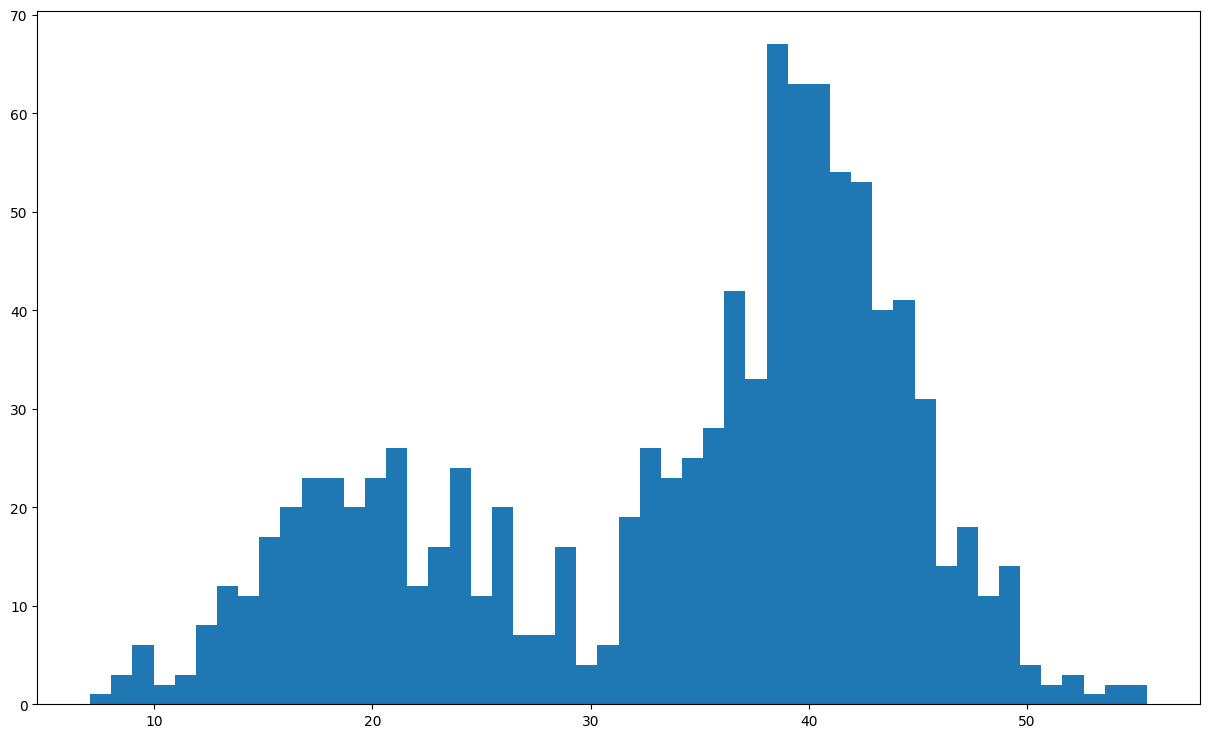

In [64]:
# Plot histogram bins=50
plt.figure(figsize = (15, 9))
plt.hist(sample, bins=50)
plt.show()

In [65]:
# Building model
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=5, kernel='gaussian')

# Convert data to a 2D array
sample = sample.reshape((len(sample), 1))

# Model Training
model.fit(sample)

KernelDensity(bandwidth=5)

In [66]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

probabilities = model.score_samples(values) # Bydefault these values are log scaled
probabilities = np.exp(probabilities)

*`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.*

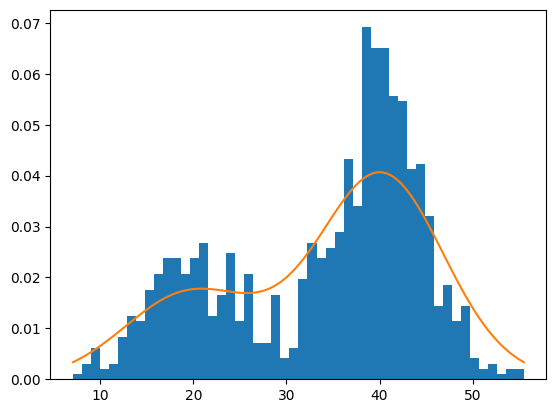

In [67]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

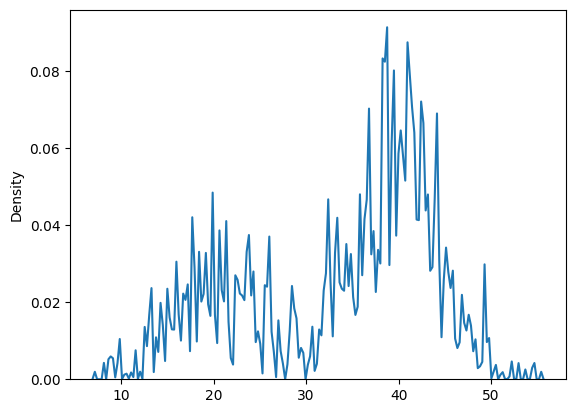

In [68]:
sns.kdeplot(sample.reshape(1000), bw_adjust=0.02) # Some how adjut the bandwidth
plt.show()

#### `Practical Use Case`

In [69]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


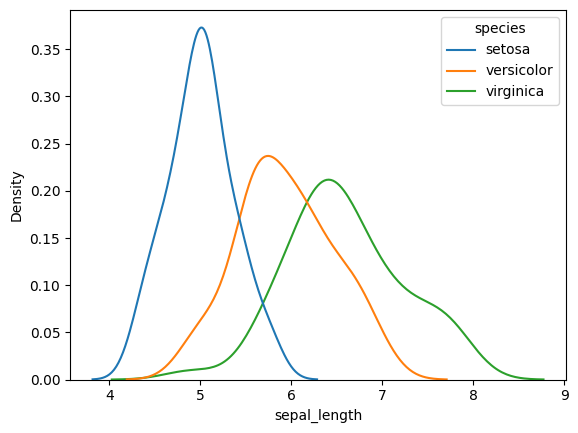

In [70]:
sns.kdeplot(data=df, x='sepal_length', hue='species')
plt.show()

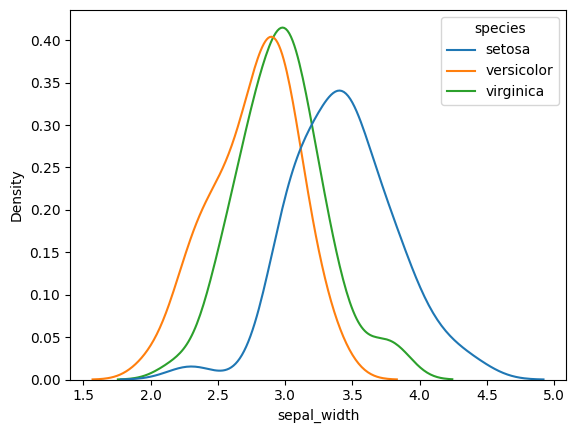

In [71]:
sns.kdeplot(data=df,x='sepal_width',hue='species')
plt.show()

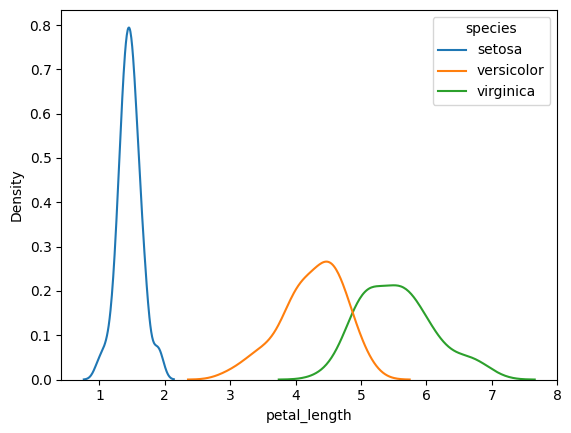

In [72]:
sns.kdeplot(data=df,x='petal_length', hue='species')
plt.show()

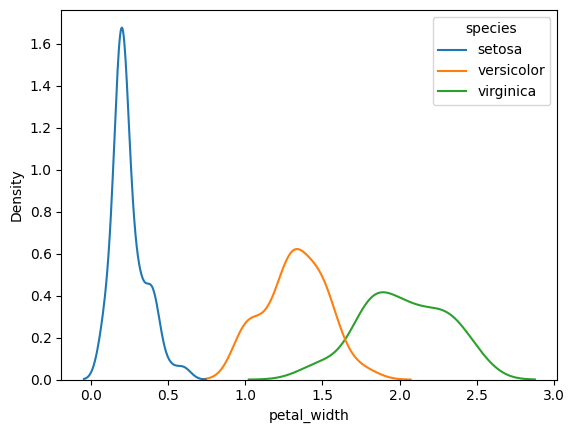

In [73]:
sns.kdeplot(data=df,x='petal_width', hue='species')
plt.show()

*`petal_length` and `petal_width` are important features who seperates `setosa` flowers*

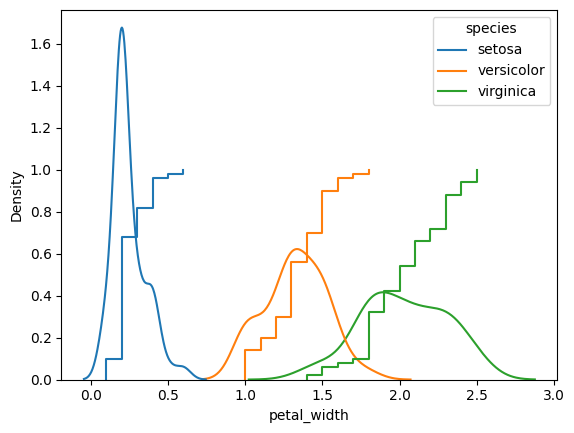

In [74]:
sns.kdeplot(data=df, x = 'petal_width', hue = 'species')
sns.ecdfplot(data=df,x='petal_width', hue='species')
plt.show()

---

In [75]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


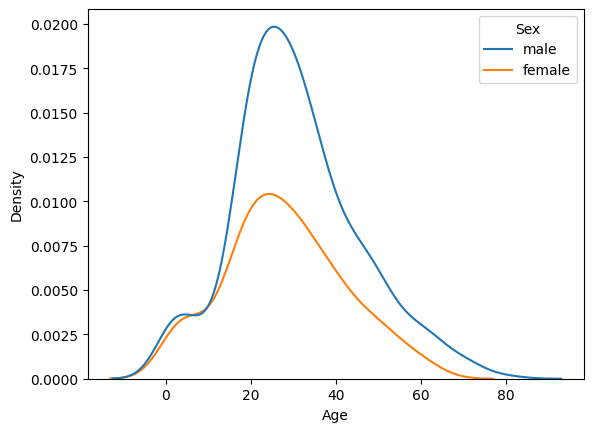

In [76]:
sns.kdeplot(data=titanic, x='Age', hue='Sex')
plt.show()

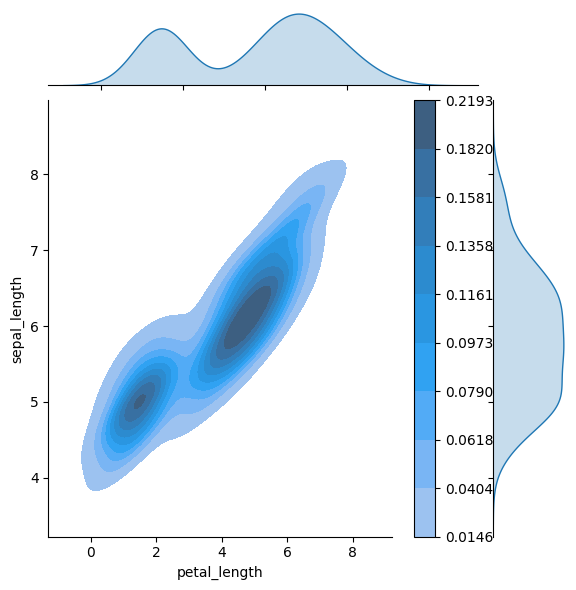

In [77]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde", fill=True, cbar=True)
plt.show()

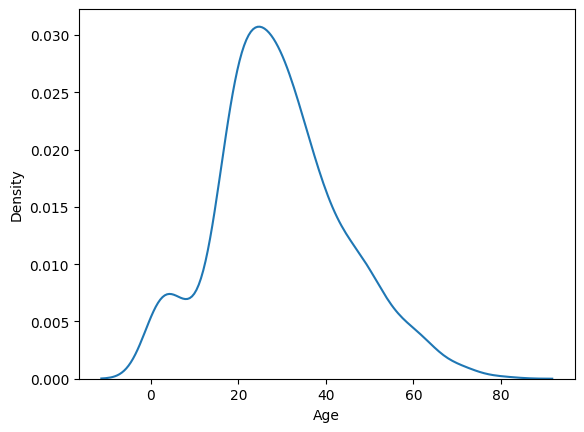

In [78]:
sns.kdeplot(titanic['Age'])
plt.show()

In [79]:
# Standardization
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

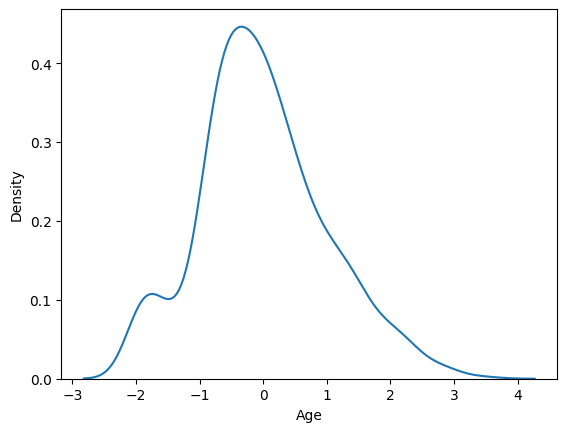

In [80]:
sns.kdeplot(x)
plt.show()

In [81]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [82]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [83]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.88037434994331)

In [84]:
# Outliers
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
